## Content in this Notebook
## Notebook is a part of FREE ML course by Glexey Grigorev. [Link for the Course](https://github.com/alexeygrigorev/mlbookcamp-code/tree/master/course-zoomcamp/02-regression)

## 1. Introduction
Cars dataset with features including make, model, year, engine, and other properties of the car used to predict its price.

## 2. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 3. Loading and Reading Data

In [2]:
df = pd.read_csv('../input/car-price-prediction/data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## 4. Data Cleaning: Cleaning Strings in Column and values

In [3]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


### Making List of Categorical Columns

In [4]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

### Cleaning Categorical Data in our data set

In [5]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(" ", "_")
    
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


## 5. Exploratory Data Analysis

for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print('\n')

## Distribution of price


<AxesSubplot:xlabel='msrp', ylabel='Count'>

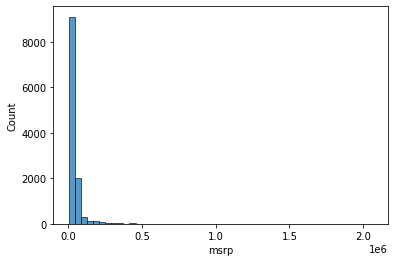

In [6]:
sns.histplot(df['msrp'], bins = 50)

## Distribution of price with msrp less than 100000

<AxesSubplot:xlabel='msrp', ylabel='Count'>

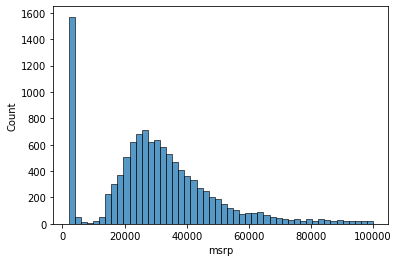

In [7]:
sns.histplot(df['msrp'][df['msrp'] < 100000], bins = 50)

## Log(msrp +1)

<AxesSubplot:xlabel='msrp', ylabel='Count'>

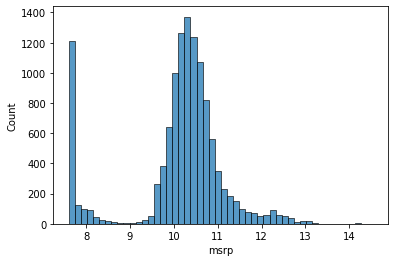

In [8]:
"""
Applying log to 'msrp' column
"""
price_logs = np.log1p(df['msrp'])
sns.histplot(price_logs, bins = 50)

## 6. Missing Values

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64


<AxesSubplot:>

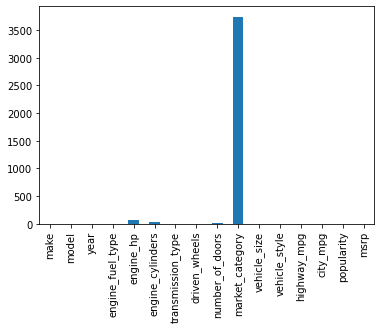

In [9]:
print(df.isnull().sum())
df.isnull().sum().plot(kind = 'bar')

## 7. Validation Framework: Creating Train Validation and Test Split Manually

In [10]:
"""
Creating length/number of values of train, validation and test set
"""
n  = len(df)    

n_val = int(n * 0.2)  # Creating Validation Set
n_test = int(n * 0.2) # Creating test set
n_train = n - n_val - n_test

"""
Setting up for randomizing the values
"""
idx = np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)


"""
Creating data set for Train Valid and Test set.
Also to randomize the index to avoid bias.
"""

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]


"""
Dropping the indexes from all the datasets as they are of no use now.
"""

df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)


"""
Making dependent variables with LOG transformation for all the datasets.
"""

y_train = np.log1p(df_train['msrp'].values)
y_val = np.log1p(df_val['msrp'].values)
y_test = np.log1p(df_test['msrp'].values)

"""
Deleting target / dependent variables from training, validation and test sets
"""
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

"""
Finally Checking the Length of Datasets created
"""
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

## 8. Linear Regression

In [11]:
"""
Taking values of 3 variables for a specific row (10): engine_hp, city_mpg, popularity
Declaring Biased Term and Weights for each features
"""
xi = [453, 11, 86] 


w0 = 0

"""
Declaring Weights for each features
"""
w =  [1, 1, 1]

"""
Creating Linear Regression Function
"""
def linear_regression(xi):
    n =len(xi)                # Number of features used
    
    pred = w0                 # Initial / Base prediction
    
    for j in range(n):
        pred += w[j]*xi[j]     # Formula = w0 +sigma[0:n-1]{w[j]*xi[j]}
    
    return pred

"""
Calling linear_regression function on xi
"""
linear_regression(xi)

550

In [12]:
"""
Changing the bias terms and checking the prediction
"""

"""Biased Term :"""
w0 = 7.17

"""#Declaring Weights for each features"""
w =  [0.01, 0.04, 0.002]

"""
Calling linear_regression function again on xi
"""
linear_regression(xi)


12.312

In [13]:
"""
Using exponent to undo the logrithm which we did initially
Also recall we did log(1 + msrp). Therefore we will need subtract 1.
"""
print("predicted prices: ", np.expm1(12.312))

predicted prices:  222347.2221101062


## 9. Linear Regression Vector Form

### Generalized Linear Regression

In [14]:
"""
Defining a function for dot product
"""
def dot(xi,w):
    n = len(xi)
    
    res = 0.0
    
    for j in range(n):
        res += xi[j]*w[j]
    return res

"""
Improvising linear_regression
"""
def linear_regression(xi):
    return w0 + dot(xi,w)
"""
More Improvising : using W.T Xi = Xi W.T = w0 + dot product as done before
We add weight of 1 to bias term and add 1 to xis also.
"""
w_new = [w0] + w
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi,w_new)


"""
checking the function again
"""
linear_regression(xi)

12.312

### Linear Regression with Multiple Variables

In [15]:
"""
Making final model with multiple vectors.
"""

"""Biased Term :"""
w0 = 7.17

"""#Declaring Weights for each features"""
w =  [0.01, 0.04, 0.002]

"""We add weight of 1 to bias term"""
w_new = [w0] + w

"""Making Variables"""
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]
"""Making X: independent variables array"""
X= [x1, x2, x10]
X = np.array(X)

"""
Linear Regression with multiple vectors
"""
def linear_regression(X):
    return X.dot(w_new)

"""
Predicting Values
"""
linear_regression(X)

array([12.38 , 13.552, 12.312])

## Training Linear Regression - Normal Equationraining Linear Regression - Normal Equation

In [16]:
"""Making Variables"""
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86]
]
 
"""Making X: independent variables array"""
X = np.array(X)
"""Declaring Target Variable"""
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

In [17]:
"""
Gram Matrix
"""
XTX = X.T.dot(X)

"""inverse of Gram Matrix"""
XTX_inv = np.linalg.inv(XTX)

"""
Not exactly identity matrix but the numbers here are very small. Hence can be treated as 0s and 1s
"""
# XTX.dot(XTX_inv).round(1)
XTX.dot(XTX_inv)

""" Model"""
w_full = XTX_inv.dot(X.T).dot(y)


"""
Creating Coefficients
"""
w0 = w_full[0]
w = w_full[1:]

"""
printing Coefficient
"""
w0, w

(26.08419497680291, array([286.12285934,   3.93813107]))

In [18]:
"""Creating a function for Training Linear Regression Model"""
def train_linear_regression(X,y):
    """
    Including a biased term
    """
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    """
    Gram Matrix
    """
    XTX = X.T.dot(X)
    
    """inverse of Gram Matrix"""
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]   


"""Training the Model"""

'Training the Model'

## 11. Car Price Baseline Model

In [19]:
"""
We need only numerical columns
"""
df_train.dtypes

"""
Creating subset of only Numerical Columns
"""
base = ['engine_hp','engine_cylinders','highway_mpg', 'city_mpg', 'popularity']

"""
Creating subset of Dataframe to be used as X.
"""
X_train = df_train[base].values

""" Training model will throw error b'coz of missing values"""
train_linear_regression(X_train,y_train)

(nan, array([nan, nan, nan, nan, nan]))

In [20]:
"""
checking missing values in our subset
"""
df_train[base].isnull().sum()

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [21]:
"""Imputing Missing values with 0 """
X_train = df_train[base].fillna(0).values

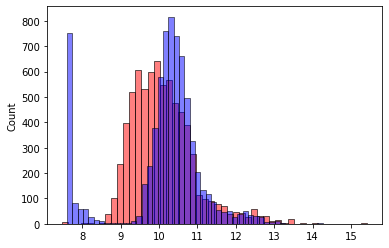

In [22]:
"""Building and Training the model """
w0, w = train_linear_regression(X_train,y_train)

""" Prediction"""
y_pred =  w0 + X_train.dot(w)

"""Visualizing the Predictions"""
sns.histplot(y_pred, color = 'red', alpha = 0.5, bins = 50)
sns.histplot(y_train, color = 'blue', alpha = 0.5, bins = 50);

## 12. Root Mean Squared Error (RMSE)

In [23]:
def rmse(y,y_pred):
    error  = y- y_pred
    squared_error = error ** 2
    mse = squared_error.mean()
    return np.sqrt(mse)  

In [24]:
rmse(y_train,y_pred)

0.7554192603920132

## 13. Validating the Model using RMSE

In [25]:
"""
Creating subset of only Numerical Columns
"""
base = ['engine_hp','engine_cylinders','highway_mpg', 'city_mpg', 'popularity']

def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [26]:
"""Preparing Training set"""
X_train = prepare_X(df_train)                            

"""Building and Training the model on training set"""
w0,w = w0, w = train_linear_regression(X_train,y_train) 

"""Prediction the values of Validation Set"""
X_val = prepare_X(df_val)                                 
y_pred = w0 + X_val.dot(w)                                

"""Evaluation on Validation set"""
rmse(y_val, y_pred)                                      

0.761653099130156

## 14. Feature Engineering

In [27]:
"""
Modifying prepare_S function to include Feature engineering step
"""
def prepare_X(df):
    df = df.copy()
    df['age'] = max(df['year']) - df['year']
    features = base + ['age']
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [28]:
X_train = prepare_X(df_train)

In [29]:
"""Preparing Training set"""
X_train = prepare_X(df_train)                            

"""Building and Training the model on training set"""
w0,w = w0, w = train_linear_regression(X_train,y_train)  

"""Prediction the values of Validation Set"""
X_val = prepare_X(df_val)                                
y_pred = w0 + X_val.dot(w)                                

"""Evaluation on Validation set"""
rmse(y_val, y_pred)                                       

0.5172055461058299

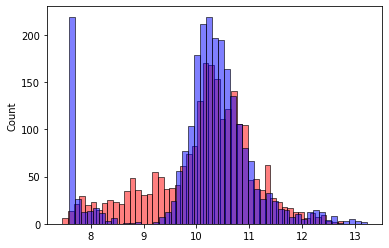

In [30]:
"""Visualizing the Predictions"""
sns.histplot(y_pred, color = 'red', alpha = 0.5, bins = 50)
sns.histplot(y_val, color = 'blue', alpha = 0.5, bins = 50);

## 15. Categorical Variables

## 16. Regularization

## 17. Tuning the Model

## 18. Using the model